In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 3

Нарисуйте график функции:
y(x) = k∙cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b

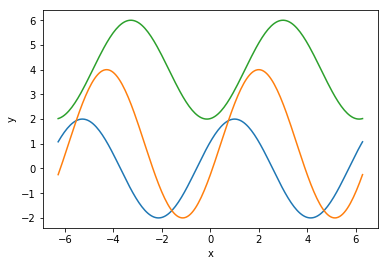

In [5]:
x = np.linspace(-2*np.pi, 2*np.pi, 201)
par = {'a':[1,2,3],'b':[0,1,4],'k':[2,3,2]}

for i in range(3):
    plt.plot(x, par['k'][i]*np.cos(x-par['a'][i])+par['b'][i])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

Напишите код, который будет переводить полярные координаты в декартовы

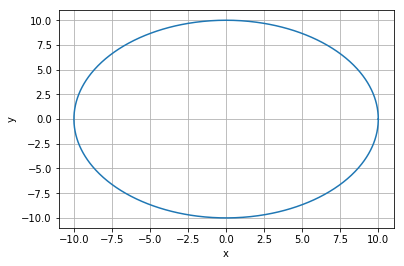

In [12]:
p = np.linspace(0, 2*np.pi, 1000)
rad = 10
x = rad * np.cos(p)
y = rad * np.sin(p)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Напишите код, который будет рисовать график окружности в полярных координатах

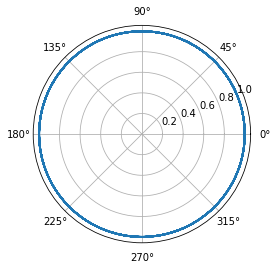

In [16]:
t = np.linspace(0, np.pi, 1000)
x = np.cos(t)
y = np.sin(t)
rad = np.sqrt(x**2 + y**2)
p = np.arctan2(y, x)*180/np.pi
plt.polar(p, rad)
plt.show()

Решите систему уравнений:

y = x2 – 1

exp(x) + x∙(1 – y) = 1


In [22]:
from scipy.optimize import fsolve

def equations(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x*(1 - y) - 1)

x1, y1 = fsolve(equations,(-1, 1))
print(x1, y1)
x2, y2 = fsolve(equations,(2, 1))
print(x2, y2)

-1.5818353528983808 1.502203083669976
2.618145573085386 5.854686241866443


Решите систему уравнений и неравенств:

y = x2 – 1

exp(x) + x∙(1 – y) > 1 

exp(x) + x∙(2 – x**2) -1 > 0


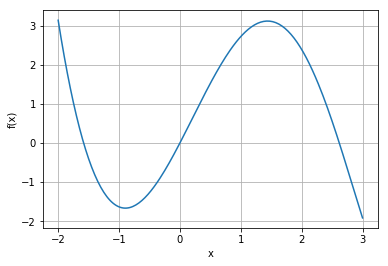

[-1.58183535]
[2.61814557]
[0.]


In [27]:
x = np.linspace(-2, 3, 201)
plt.plot(x, np.exp(x) + x*(2 - x**2) - 1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

from scipy.optimize import fsolve

def equations(x):
    return (np.exp(x) + x*(2 - x**2) - 1)

x1 = fsolve(equations,(-2))
print(x1)

x2 = fsolve(equations,(2))
print(x2)              

x0 = fsolve(equations,(0))
print(x0)


### Рещение x<-1.58, 0<x<2.6

## Заданиe 4

Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [44]:
for i in range(11):
    x = np.random.randint(0, 36)
    print(x)

23
3
17
29
28
11
31
21
21
23
35


Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки

##### Проверим сложение вероятностей

In [49]:
k, m, a = 0, 0, 0
n = 1000
for i in range(n):
    x = np.random.uniform(0, 10)
    y = np.random.uniform(0, 10)
    if x < 5: k += 1 #орёл
    if y < 5: m += 1 #орёл
    
    if x < 5 or y < 5: a += 1
        
print(k/n, m/n, a/n)

0.523 0.488 0.753


Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

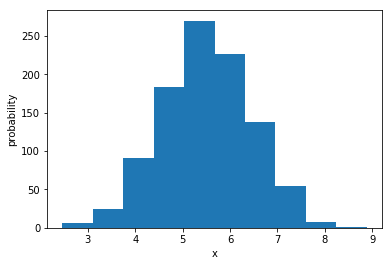

In [67]:
n = 1000
x = np.zeros(shape=(n))
m = [np.random.rand(n) for i in range(11)]
for me in m:
    x = x + me
nbins = 10
plt.hist(x, nbins)
plt.xlabel('x')
plt.ylabel('probability')
plt.show()

Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.


In [81]:
k, n = 0, 10000
x = np.zeros(shape=(n))
m = [np.random.randint(0,2,n) for i in range(5)]
for me in m:
    x = x + me
for el in x:
    if el == 2: k += 1

print(k,n,k/n)        

3189 10000 0.3189


In [80]:
import math
n, k = 4, 2
p = 0.5
q = 1 - p
C = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
P = C * p**k * q**(n - k)
print(C, P)

6.0 0.375


Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k

In [84]:
n, k = 8, 2
p = 0.5
q = 1 - p
C = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
P = C * p**k * q**(n - k)
print(C, P)

28.0 0.109375


Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [90]:
import itertools

for p in itertools.product('01',repeat=3):
    print(''.join(p))

000
001
010
011
100
101
110
111


In [91]:
for p in itertools.permutations('0123', 3):
    print(''.join(str(x) for x in p))

012
013
021
023
031
032
102
103
120
123
130
132
201
203
210
213
230
231
301
302
310
312
320
321


In [92]:
for p in itertools.combinations('0123', 3):
    print(''.join(str(x) for x in p))

012
013
023
123


Дополните код расчетом коэффициента корреляции x и y

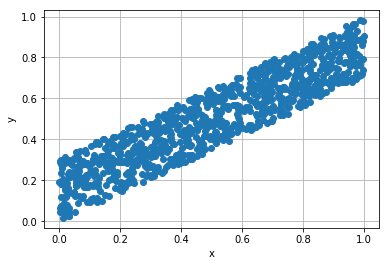

[[1.         0.91788604]
 [0.91788604 1.        ]]


In [93]:
n = 1000
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
c = np.corrcoef(x, y) 
print(c)

In [94]:
xm = np.sum(x)/n
ym = np.sum(y)/n
x1 = x - xm
y1 = y - ym
Rxy = np.sum(x1*y1)/math.sqrt(np.sum(x1 * x1) * np.sum(y1 * y1))
print(xm, ym, Rxy)

0.4992305934582674 0.5009159780462037 0.9178860393613345


## Заданиe 4

Вычислите определитель

In [95]:
m = np.array([[1,2,3],[4,0,6],[7,8,9]])
np.linalg.det(m)

59.999999999999986

In [100]:
1*(0*9-6*8)-2*(4*9-7*6)+3*(4*8-7*0)

60

Вычислите матрицу, обратную данной

In [101]:
m = np.array([[1,2,3],[4,0,6],[7,8,9]])
np.linalg.inv(m)

array([[-0.8       ,  0.1       ,  0.2       ],
       [ 0.1       , -0.2       ,  0.1       ],
       [ 0.53333333,  0.1       , -0.13333333]])

Приведите пример матрицы 4х4, ранг которой равен 1

In [113]:
m = np.array([[1,1,1],[1,1,1],[1,1,1]])
np.linalg.matrix_rank(m)

1

Вычислите скалярное произведение двух векторов:  
(1, 5)  и  (2, 8)


In [107]:
a = np.array([1, 5])
b = np.array([2, 8])
np.dot(a, b)

42

In [108]:
1*2 + 5*8

42

Вычислите смешанное произведение трех векторов:
(1, 5, 0), (2, 8, 7) и (7, 1.5, 3) 


In [112]:
a = np.array([1, 5, 0])
b = np.array([2, 8, 7])
c = np.array([7, 1.5, 3])
v = np.cross(a, b)
w = np.inner(v, c)
print(w)

228.5
